In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import fiona
import rtree

pd.options.display.max_rows = 10

In [2]:
import fiona
import rtree

In [3]:
barrios = pd.read_csv("barrios.csv", encoding='latin1')

In [4]:
barrios.head(10)

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06
5,"POLYGON ((-58.4306058283309 -34.6070470885963,...",CABALLITO,6.0,10990.964471,6.851029e+06
6,"POLYGON ((-58.4819203599833 -34.6242871724757,...",VILLA SANTA RITA,11.0,5757.752335,2.153691e+06
7,"POLYGON ((-58.5034920611534 -34.6240324216321,...",MONTE CASTRO,10.0,7361.036418,2.627481e+06
8,"POLYGON ((-58.525116079791 -34.613999981063,-5...",VILLA REAL,10.0,5070.965652,1.334146e+06
9,"POLYGON ((-58.4452515823782 -34.6420397134706,...",FLORES,7.0,15772.425185,8.590784e+06


In [5]:
def from_wkt(df, wkt_column):
    import shapely.wkt
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(barrios, geometry='coordinates')
    return gdf
    

In [6]:
barrios = from_wkt(barrios, "WKT")

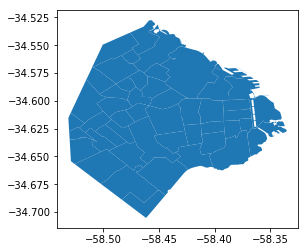

In [7]:
barrios.plot()

In [8]:
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,coordinates
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((-58.4528200492791 -34.5959886570639,..."
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((-58.4655768128541 -34.5965577078058,..."
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06,"POLYGON ((-58.4237529813037 -34.5978273383243,..."
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((-58.4946097568899 -34.6148652395239,..."
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((-58.4128700313089 -34.6141162515854,..."


In [9]:
mis_barrios = barrios[barrios.BARRIO.isin(["PALERMO", 'BELGRANO', 'RECOLETA'])]

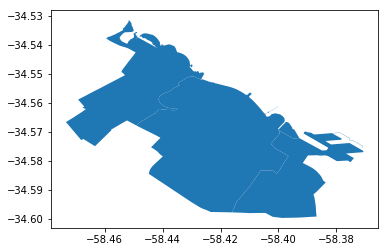

In [10]:
mis_barrios.plot()

In [11]:
data = pd.read_csv("./DATA/properattilimpio.csv", encoding='latin1')

In [12]:
data.rename(columns={'lat' : 'latitud', 'lon' : 'longitud'}, inplace = True) 

In [13]:
def from_x_y(df, x, y):
    from shapely.geometry import Point
    gdf = geopandas.GeoDataFrame(df,
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

In [14]:
data = from_x_y(data, "longitud","latitud")

In [15]:
result=geopandas.sjoin(mis_barrios, data, how = "left")

C:\Users\juan\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')
C:\Users\juan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [16]:
result = result.drop(result.columns[[0, 2, 3, 4, 5]], axis=1)


In [17]:
result = result.set_index('index_right')

In [18]:
result.rename(columns={'BARRIO_left' : 'BARRIO', 'BARRIO_right' : 'SUBBARRIO'}, inplace = True) 

In [19]:
result = from_x_y(result, "longitud","latitud")

In [20]:
result.to_csv("./DATA/pal-bel-rec.csv")

In [21]:
result

,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,price_aprox_local_currency,...,lavadero,balcon,terraza,sum,solarium,parrilla,a estrenar,subte,cochera,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
1915,PALERMO,8196,8196,apartment,"-34.5699834561,-58.4346691662",-34.569983,-58.434669,790000.0,USD,13939155.0,...,1,1,1,1,1,1,0,0,1,POINT (-58.4346691662 -34.5699834561)
17594,PALERMO,54303,54303,apartment,"-34.5711496,-58.4232966",-34.571150,-58.423297,780000.0,USD,13762710.0,...,1,1,0,0,0,0,0,0,0,POINT (-58.4232966 -34.57114960000001)
16545,PALERMO,51178,51178,apartment,"-34.5693554857,-58.4333625453",-34.569355,-58.433363,245000.0,USD,4322902.5,...,0,0,1,0,0,1,1,0,0,POINT (-58.4333625453 -34.5693554857)
16566,PALERMO,51215,51215,apartment,"-34.580572,-58.4400316",-34.580572,-58.440032,330000.0,USD,5822685.0,...,0,1,0,1,1,1,0,0,1,POINT (-58.4400316 -34.580572)
16586,PALERMO,51315,51315,apartment,"-34.5809781,-58.4289623",-34.580978,-58.428962,125000.0,USD,2205562.5,...,1,0,0,0,0,0,0,1,0,POINT (-58.4289623 -34.5809781)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,RECOLETA,6834,6834,apartment,"-34.5933877,-58.4054051",-34.593388,-58.405405,285000.0,USD,5028682.5,...,0,0,0,0,0,0,0,0,0,POINT (-58.4054051 -34.5933877)
18950,RECOLETA,57729,57729,apartment,"-34.5958568,-58.3876966",-34.595857,-58.387697,380000.0,USD,6704910.0,...,1,1,0,0,0,0,0,0,0,POINT (-58.3876966 -34.5958568)
16119,RECOLETA,49916,49916,apartment,"-34.596714,-58.4155071",-34.596714,-58.415507,115000.0,USD,2029117.5,...,0,0,0,1,0,1,1,0,1,POINT (-58.4155071 -34.596714)


In [22]:
muestra = data.sample(200)

In [23]:
import folium
m = folium.Map([-34.606359, -58.443863], zoom_start=11, tiles="OpenStreetMap")
folium.GeoJson(mis_barrios.to_json()).add_to(m)
folium.GeoJson(muestra.to_json()).add_to(m)
m